In [2]:
from KRZmetric import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
M=2e5
spin=0.300
e=0.5
p=6

In [40]:
def getfreq_sec_fromepma(e,p,M,spin):

    omg=np.array(getfreq_dt_fromepa(e,p,spin))
    ########转换单位
    Grav=6.674e-11 #引力常数
    clight=2.998e8 #光速
    Msol=1.989e30  #太阳质量，以千克做单位

    #把频率换成s^-1
    omgsec=omg*clight**3/M/Msol/Grav
    return omgsec
omgr,omgphi=getfreq_sec_fromepma(e,p,M,spin)

In [24]:
filename='C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\RK4geo8_dt\\RK4geo8_dt\\trace_M%.0f_spin%.6f_d1%.6f_e%.6f_p%.6f.dat'%(M,spin,0,e,p)
index, tau,t,r,th,phi,ut,ur,uth,uphi,F_t,F_r,F_th,F_phi=np.loadtxt(filename,unpack=True)


In [25]:
def getfreq_sec_frommaxi(t,r,phi,M):

    omgavg=np.array(getfreq_dt_frommaxi(t,r,phi))
    ########转换单位
    Grav=6.674e-11 #引力常数
    clight=2.998e8 #光速
    Msol=1.989e30  #太阳质量，以千克做单位

    #把频率换成s^-1
    omgavgsec=omgavg*clight**3/M/Msol/Grav
    return omgavgsec

print(getfreq_sec_frommaxi(t,r,phi,M))
#print(omgavg)

[ 0.01940541  0.06231897]


In [41]:
omgr,omgphi

(0.019405285183499713, 0.062313002793882778)

In [76]:
#试试解M=2e5, d1=0.2, spin=0.5, e=0.5, p=6的角频率对应Kerr的M，spin是多少
M=2e5
spin=0.500
e=0.1
p=5
d1=-0.1
dlist=[]
Mlist=[]
spinlist=[]

for d1 in np.arange(-0.2,0.6,0.1):
    filename='C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\RK4geo8_dt\\RK4geo8_dt\\trace_M%.0f_spin%.6f_d1%.6f_e%.6f_p%.6f.dat'%(M,spin,d1,e,p)
    index, tau,t,r,th,phi,ut,ur,uth,uphi,F_t,F_r,F_th,F_phi=np.loadtxt(filename,unpack=True)


    avgomgsec=getfreq_sec_frommaxi(t,r,phi,M)
    print(avgomgsec)
    avgomgr=avgomgsec[0]
    avgomgphi=avgomgsec[1]

    def fun(x):
        print('called')
        M=x[0]
        spin=x[1]
        print('e=%f, p=%f, M=%f, spin=%f, aimomgr=%f, aimomgphi=%f'%(e,p,M,spin,avgomgr,avgomgphi))

        omgr,omgphi=getfreq_sec_fromepma(e,p,M,spin)
        avgomgsec=np.array([avgomgr,avgomgphi])
        omgsec=np.array([omgr,omgphi])
        return (omgsec-avgomgsec)/avgomgsec


    from scipy.optimize import root,fsolve
    (myM,myspin)=fsolve(fun,[M,spin])

    getfreq_sec_fromepma(e,p,myM,myspin)

    dlist.append(d1)
    spinlist.append(myspin)
    Mlist.append(myM)
    for i in range(len(dlist)):
        print([dlist[i],spinlist[i],Mlist[i]])

[ 0.02179742  0.08915095]
called
e=0.100000, p=5.000000, M=200000.000000, spin=0.500000, aimomgr=0.021797, aimomgphi=0.089151
called
e=0.100000, p=5.000000, M=200000.000000, spin=0.500000, aimomgr=0.021797, aimomgphi=0.089151
called
e=0.100000, p=5.000000, M=200000.000000, spin=0.500000, aimomgr=0.021797, aimomgphi=0.089151
called
e=0.100000, p=5.000000, M=200000.002980, spin=0.500000, aimomgr=0.021797, aimomgphi=0.089151
called
e=0.100000, p=5.000000, M=200000.000000, spin=0.500000, aimomgr=0.021797, aimomgphi=0.089151
called
e=0.100000, p=5.000000, M=197733.797475, spin=0.368083, aimomgr=0.021797, aimomgphi=0.089151
called
e=0.100000, p=5.000000, M=198521.360058, spin=0.407585, aimomgr=0.021797, aimomgphi=0.089151
called
e=0.100000, p=5.000000, M=198174.830630, spin=0.397739, aimomgr=0.021797, aimomgphi=0.089151
called
e=0.100000, p=5.000000, M=198078.455441, spin=0.396110, aimomgr=0.021797, aimomgphi=0.089151
called
e=0.100000, p=5.000000, M=198082.506857, spin=0.396200, aimomgr=0.0

called
e=0.100000, p=5.000000, M=200000.000000, spin=0.500000, aimomgr=0.042412, aimomgphi=0.082784
called
e=0.100000, p=5.000000, M=204403.558882, spin=0.675888, aimomgr=0.042412, aimomgphi=0.082784
called
e=0.100000, p=5.000000, M=204312.303005, spin=0.724856, aimomgr=0.042412, aimomgphi=0.082784
called
e=0.100000, p=5.000000, M=204157.422809, spin=0.738523, aimomgr=0.042412, aimomgphi=0.082784
called
e=0.100000, p=5.000000, M=204143.151837, spin=0.739119, aimomgr=0.042412, aimomgphi=0.082784
called
e=0.100000, p=5.000000, M=204142.792832, spin=0.739116, aimomgr=0.042412, aimomgphi=0.082784
called
e=0.100000, p=5.000000, M=204142.774149, spin=0.739115, aimomgr=0.042412, aimomgphi=0.082784
called
e=0.100000, p=5.000000, M=204142.775908, spin=0.739115, aimomgr=0.042412, aimomgphi=0.082784
called
e=0.100000, p=5.000000, M=204142.775908, spin=0.739115, aimomgr=0.042412, aimomgphi=0.082784
[-0.20000000000000001, 0.39619945389451605, 198082.49336172949]
[-0.10000000000000001, 0.44688699356

In [77]:
spinl5=spinlist
Ml5=Mlist

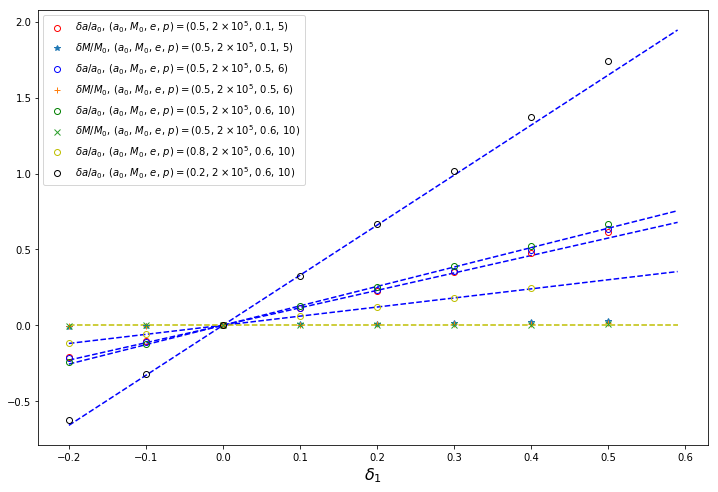

In [90]:
plt.figure(figsize=[12,8])
plt.plot(np.arange(-0.2,0.6,0.01),1.28*np.arange(-0.2,0.6,0.01),'b--')
plt.plot(np.arange(-0.2,0.6,0.01),1.15*np.arange(-0.2,0.6,0.01),'b--')
plt.plot(np.arange(-0.2,0.6,0.01),3.3*np.arange(-0.2,0.6,0.01),'b--')
plt.plot(np.arange(-0.2,0.6,0.01),0.6*np.arange(-0.2,0.6,0.01),'b--')
plt.plot(np.arange(-0.2,0.6,0.01),np.zeros([80]),'y--')
plt.plot(dlist,(np.array(spinl5)-0.5)/0.5,'ro',markerfacecolor='none',label='$\\delta a/a_0,\, (a_0,\, M_0,\, e,\, p)=(0.5,\, 2\\times10^5,\, 0.1,\, 5)$')
plt.plot(dlist,(np.array(Ml5)-2e5)/2e5,'*',label='$\\delta M/M_0,\, (a_0,\, M_0,\, e,\, p)=(0.5,\, 2\\times10^5,\, 0.1,\, 5)$')
plt.plot(dlist,(np.array(spinl1)-0.5)/0.5,'bo',markerfacecolor='none',label='$\\delta a/a_0,\, (a_0,\, M_0,\, e,\, p)=(0.5,\, 2\\times10^5,\, 0.5,\, 6)$')
plt.plot(dlist,(np.array(Ml1)-2e5)/2e5,'+',label='$\\delta M/M_0,\, (a_0,\, M_0,\, e,\, p)=(0.5,\, 2\\times10^5,\, 0.5,\, 6)$')
plt.plot(dlist,(np.array(spinl2)-0.5)/0.5,'go',markerfacecolor='none',label='$\\delta a/a_0,\, (a_0,\, M_0,\, e,\, p)=(0.5,\, 2\\times10^5,\, 0.6,\, 10)$')
plt.plot(dlist,(np.array(Ml2)-2e5)/2e5,'x',label='$\\delta M/M_0,\, (a_0,\, M_0,\, e,\, p)=(0.5,\, 2\\times10^5,\, 0.6,\, 10)$')
plt.plot(dlist[0:7],(np.array(spinl3[0:7])-0.8)/0.8,'yo',markerfacecolor='none',label='$\\delta a/a_0,\, (a_0,\, M_0,\, e,\, p)=(0.8,\, 2\\times10^5,\, 0.6,\, 10)$')
#plt.plot(dlist,(np.array(Ml3)-2e5)/2e5,'+',label='$\\delta M/M_0,\, (a_0,\, M_0,\, e,\, p)=(0.8,\, 2\\times10^5,\, 0.6,\, 10)$')
plt.plot(dlist,(np.array(spinl4)-0.2)/0.2,'ko',markerfacecolor='none',label='$\\delta a/a_0,\, (a_0,\, M_0,\, e,\, p)=(0.2,\, 2\\times10^5,\, 0.6,\, 10)$')

plt.xlabel('$\\delta _1$',fontsize=16)
plt.legend()
plt.savefig('d1_deltaspin.png',dpi=600)

In [60]:
spinl4

[0.074498684700978909,
 0.13635549898138122,
 0.20000115560667739,
 0.26554151719503771,
 0.33309267817343313,
 0.40278329810952029,
 0.47474110599944336,
 0.54913180655276272]

In [97]:
#试试解M=2e5, d1=0.2, spin=0.5, e=0.5, p=6的角频率对应Kerr的M，spin是多少
M=2e5
spin=0.500
e=0.1
p=5
d1=-0.2

filename='C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\RK4geo8_dt\\RK4geo8_dt\\trace_M%.0f_spin%.6f_d1%.6f_e%.6f_p%.6f.dat'%(M,spin,d1,e,p)
index, tau,t,r,th,phi,ut,ur,uth,uphi,F_t,F_r,F_th,F_phi=np.loadtxt(filename,unpack=True)


avgomgsec=getfreq_sec_frommaxi(t,r,phi,M)
print(avgomgsec)
avgomgr=avgomgsec[0]
avgomgphi=avgomgsec[1]

def fun(x):
    print('called')
    M=x[0]
    spin=x[1]
    print('e=%f, p=%f, M=%f, spin=%f, aimomgr=%f, aimomgphi=%f'%(e,p,M,spin,avgomgr,avgomgphi))

    omgr,omgphi=getfreq_sec_fromepma(e,p,M,spin)
    avgomgsec=np.array([avgomgr,avgomgphi])
    omgsec=np.array([omgr,omgphi])
    return (omgsec-avgomgsec)/avgomgsec


from scipy.optimize import root,fsolve
(myM,myspin)=fsolve(fun,[M,spin])
getfreq_sec_fromepma(e,p,myM,myspin)

print(myM,myspin)

[ 0.02179742  0.08915095]
called
e=0.100000, p=5.000000, M=200000.000000, spin=0.500000, aimomgr=0.021797, aimomgphi=0.089151
called
e=0.100000, p=5.000000, M=200000.000000, spin=0.500000, aimomgr=0.021797, aimomgphi=0.089151
called
e=0.100000, p=5.000000, M=200000.000000, spin=0.500000, aimomgr=0.021797, aimomgphi=0.089151
called
e=0.100000, p=5.000000, M=200000.002980, spin=0.500000, aimomgr=0.021797, aimomgphi=0.089151
called
e=0.100000, p=5.000000, M=200000.000000, spin=0.500000, aimomgr=0.021797, aimomgphi=0.089151
called
e=0.100000, p=5.000000, M=197733.797475, spin=0.368083, aimomgr=0.021797, aimomgphi=0.089151
called
e=0.100000, p=5.000000, M=198521.360058, spin=0.407585, aimomgr=0.021797, aimomgphi=0.089151
called
e=0.100000, p=5.000000, M=198174.830630, spin=0.397739, aimomgr=0.021797, aimomgphi=0.089151
called
e=0.100000, p=5.000000, M=198078.455441, spin=0.396110, aimomgr=0.021797, aimomgphi=0.089151
called
e=0.100000, p=5.000000, M=198082.506857, spin=0.396200, aimomgr=0.0

In [92]:
#Observation angle, will be used to transform hbar to hTT 
PHI=0/180*np.pi  #azimuthal angle, in rad
THETA=45/180*np.pi  #latitude angle, in rad

krzwave=getwave(filename,THETA,PHI)
filenamekerr=filename='C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\RK4geo8_dt\\RK4geo8_dt\\trace_M%.0f_spin%.6f_d1%.6f_e%.6f_p%.6f.dat'%(myM,myspin,0,e,p)
kerrwave=getwave(filenamekerr,THETA,PHI)

D:\ProgramFiles\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(99000, 100000)

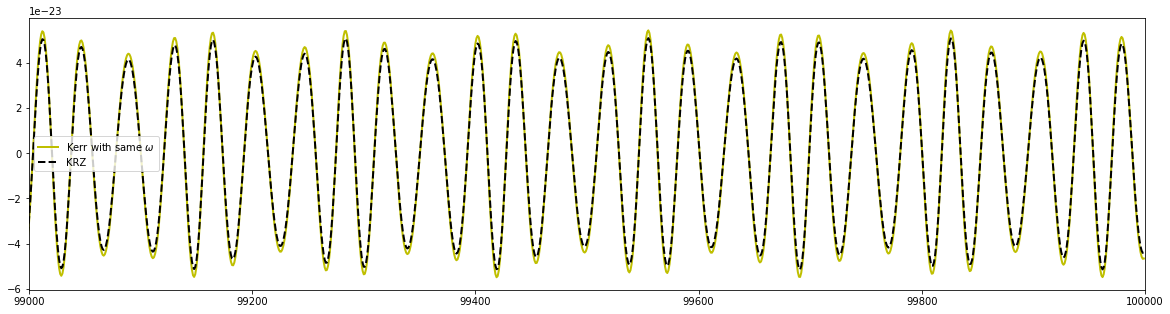

In [96]:

import matplotlib.pyplot as plt
plt.figure(figsize=[20,5])
plt.plot(np.arange(100000),kerrwave[1],'y',label='Kerr with same $\\omega$',linewidth=2)
plt.plot(np.arange(100000),krzwave[1],'k--',label='KRZ',linewidth=2)
plt.legend()
plt.xlim(99000,100000)

In [94]:
bracket(kerrwave[1],krzwave[1],1)/np.sqrt( bracket(kerrwave[1],kerrwave[1],1)*bracket(krzwave[1],krzwave[1],1) )

0.9999259364471218

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=[20,5])
plt.plot(np.arange(100000),kerrwave[1],'y',label='Kerr with same $\\omega$',linewidth=2)
plt.plot(np.arange(100000),krzwave[1],'k--',label='KRZ',linewidth=2)
plt.legend()
plt.xlim(98000,100000)

In [60]:
M=myM
spin=myspin
e=0.5
p=6
d1=0

filename='C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\RK4geo8_dt\\RK4geo8_dt\\trace_M%.0f_spin%.6f_d1%.6f_e%.6f_p%.6f.dat'%(M,spin,d1,e,p)
index, tau,t,r,th,phi,ut,ur,uth,uphi,F_t,F_r,F_th,F_phi=np.loadtxt(filename,unpack=True)


In [62]:
bestkerromgsec=getfreq_sec_frommaxi(t,r,phi,M)
bestkerromgsec

array([ 0.0271823 ,  0.05076356])

In [63]:

M=2e5
spin=0.500
e=0.5
p=6
d1=0.2

filenamekrz='C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\RK4geo8_dt\\RK4geo8_dt\\trace_M%.0f_spin%.6f_d1%.6f_e%.6f_p%.6f.dat'%(M,spin,d1,e,p)
#index, tau,t,r,th,phi,ut,ur,uth,uphi,F_t,F_r,F_th,F_phi=np.loadtxt(filename,unpack=True)

M=myM
spin=myspin
e=0.5
p=6
d1=0

filenamekerr='C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\RK4geo8_dt\\RK4geo8_dt\\trace_M%.0f_spin%.6f_d1%.6f_e%.6f_p%.6f.dat'%(M,spin,d1,e,p)
#index, tau,t,r,th,phi,ut,ur,uth,uphi,F_t,F_r,F_th,F_phi=np.loadtxt(filename,unpack=True)


In [64]:

#Observation angle, will be used to transform hbar to hTT 
PHI=0/180*np.pi  #azimuthal angle, in rad
THETA=45/180*np.pi  #latitude angle, in rad
kerrwave=getwave(filenamekerr,THETA,PHI)
krzwave=getwave(filenamekrz,THETA,PHI)

D:\ProgramFiles\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(98000, 100000)

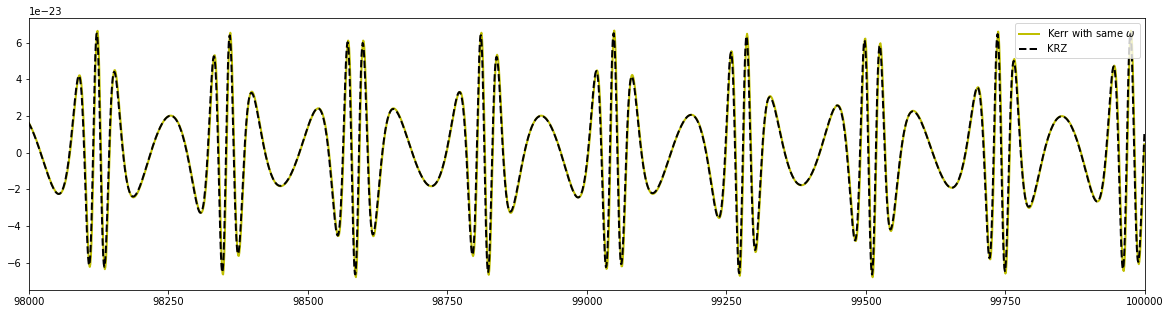

In [86]:

import matplotlib.pyplot as plt
plt.figure(figsize=[20,5])
plt.plot(np.arange(100000),kerrwave[1],'y',label='Kerr with same $\\omega$',linewidth=2)
plt.plot(np.arange(100000),krzwave[1],'k--',label='KRZ',linewidth=2)
plt.legend()
plt.xlim(98000,100000)

In [77]:
bracket(kerrwave[1],krzwave[1],1)/np.sqrt( bracket(kerrwave[1],kerrwave[1],1)*bracket(krzwave[1],krzwave[1],1) )

0.99791139261294637

In [37]:
#试试解M=2e5, d1=0.2, spin=0.5, e=0.5, p=6的角频率对应Kerr的M，spin是多少
M=2e5
spin=0.500
e=0.9
p=10
d1=0.2

filename='C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\RK4geo8_dt\\RK4geo8_dt\\trace_M%.0f_spin%.6f_d1%.6f_e%.6f_p%.6f.dat'%(M,spin,d1,e,p)
index, tau,t,r,th,phi,ut,ur,uth,uphi,F_t,F_r,F_th,F_phi=np.loadtxt(filename,unpack=True)


avgomgsec=getfreq_sec_frommaxi(t,r,phi,M)
print(avgomgsec)
avgomgr=avgomgsec[0]
avgomgphi=avgomgsec[1]

def fun(x):
    print('called')
    e=x[0]
    p=x[1]
    print('e=%f, p=%f, M=%f, spin=%f, aimomgr=%f, aimomgphi=%f'%(e,p,M,spin,avgomgr,avgomgphi))

    omgr,omgphi=getfreq_sec_fromepma(e,p,M,spin)
    avgomgsec=np.array([avgomgr,avgomgphi])
    omgsec=np.array([omgr,omgphi])
    return (omgphi-avgomgphi),e*(omgr-avgomgr)


from scipy.optimize import root,fsolve
sol=root(fun,[e,p])
mye=sol.x[0]
myp=sol.x[1]
getfreq_sec_fromepma(mye,myp,M,spin)

print(mye,myp)

[ 0.00249849  0.00342771]
called
e=0.900000, p=10.000000, M=200000.000000, spin=0.500000, aimomgr=0.002498, aimomgphi=0.003428
called
e=0.900000, p=10.000000, M=200000.000000, spin=0.500000, aimomgr=0.002498, aimomgphi=0.003428
called
e=0.900000, p=10.000000, M=200000.000000, spin=0.500000, aimomgr=0.002498, aimomgphi=0.003428
called
e=0.900000, p=10.000000, M=200000.000000, spin=0.500000, aimomgr=0.002498, aimomgphi=0.003428
called
e=0.900000, p=10.000000, M=200000.000000, spin=0.500000, aimomgr=0.002498, aimomgphi=0.003428
called
e=0.893398, p=10.608900, M=200000.000000, spin=0.500000, aimomgr=0.002498, aimomgphi=0.003428
called
e=0.892701, p=10.671336, M=200000.000000, spin=0.500000, aimomgr=0.002498, aimomgphi=0.003428
called
e=0.892623, p=10.678166, M=200000.000000, spin=0.500000, aimomgr=0.002498, aimomgphi=0.003428
called
e=0.892623, p=10.678209, M=200000.000000, spin=0.500000, aimomgr=0.002498, aimomgphi=0.003428
called
e=0.892623, p=10.678207, M=200000.000000, spin=0.500000, a

In [39]:
#Observation angle, will be used to transform hbar to hTT 
PHI=0/180*np.pi  #azimuthal angle, in rad
THETA=45/180*np.pi  #latitude angle, in rad

krzwave=getwave(filename,THETA,PHI)
filenamekerr=filename='C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\RK4geo8_dt\\RK4geo8_dt\\trace_M%.0f_spin%.6f_d1%.6f_e%.6f_p%.6f.dat'%(M,spin,0,mye,myp)
kerrwave=getwave(filenamekerr,THETA,PHI)

D:\ProgramFiles\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(90000, 100000)

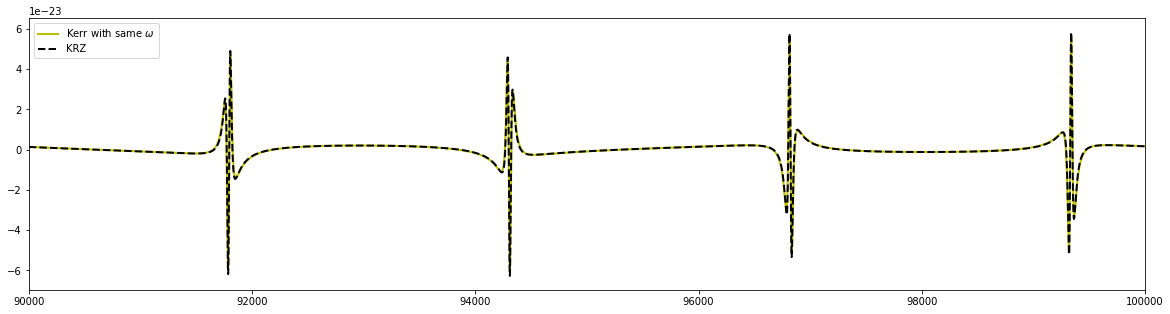

In [42]:

import matplotlib.pyplot as plt
plt.figure(figsize=[20,5])
plt.plot(np.arange(100000),kerrwave[1],'y',label='Kerr with same $\\omega$',linewidth=2)
plt.plot(np.arange(100000),krzwave[1],'k--',label='KRZ',linewidth=2)
plt.legend()
plt.xlim(90000,100000)

In [41]:
bracket(kerrwave[1],krzwave[1],1)/np.sqrt( bracket(kerrwave[1],kerrwave[1],1)*bracket(krzwave[1],krzwave[1],1) )

0.99066314006559986

In [38]:
getfreq_sec_fromepma(mye,myp,M,spin)

array([ 0.00249849,  0.00342771])

In [6]:
np.zeros((4,4,4))

array([[[ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.]]])